# Lab 2: Data Preparation

**Student ID:** 17210577 <br>
**Student Name:** Lena Stolz

## I. Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading in the .csv file
dataFrame = pd.read_csv('./bank.csv')

In [5]:
# Check for missing values
dataFrame.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [ ]:
# Create copy of dataframe
dataFrame_original = dataFrame

## II. Process and Encode the Categorical Features

In [9]:
#dataFrame.drop('Loan_ID', axis = 1, inplace = True)
#dataFrame.tail()

### Encode Ordinal Categorical Attributes

In [10]:
education_mapper = {"primary": 1, "secondary": 2, "tertiary": 3}
dataFrame['education'] = dataFrame['education'].replace(education_mapper)

dataFrame.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [11]:
month_mapper = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
dataFrame['month'] = dataFrame['month'].replace(month_mapper)

dataFrame.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


### One-Hot Encode All Other Categorical Attributes

In [12]:
# One-hot encoding of columns with NaNs
dataFrame = pd.get_dummies(dataFrame, columns = ['job', 'contact', 'poutcome'],
                                      dummy_na = True,
                                      drop_first = True)
dataFrame.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
0,32.0,single,3.0,no,392,yes,no,1,4,957,2,131,2,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,39.0,divorced,2.0,no,688,yes,yes,1,4,233,2,133,1,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,59.0,married,2.0,no,1035,yes,yes,1,4,126,2,239,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,47.0,married,2.0,no,398,yes,yes,1,4,274,1,238,2,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54.0,married,2.0,no,1004,yes,no,1,4,479,1,307,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# One-hot encoding the remaining categoru=ical columns
dataFrame = pd.get_dummies(dataFrame, drop_first = True)
dataFrame.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,3.0,392,1,4,957,2,131,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,39.0,2.0,688,1,4,233,2,133,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,59.0,2.0,1035,1,4,126,2,239,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,47.0,2.0,398,1,4,274,1,238,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,54.0,2.0,1004,1,4,479,1,307,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [14]:
dataFrame.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

## III. Missing Values

In [15]:
# Here we replace the NaNs in education column with '0' 
dataFrame['education'].fillna(0, inplace = True)
dataFrame.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,0.0,2785,16,9,327,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1996,28.0,2.0,127,16,9,1334,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1997,81.0,1.0,1154,17,9,231,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1998,46.0,1.0,4343,20,9,185,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
1999,40.0,2.0,6403,22,9,208,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


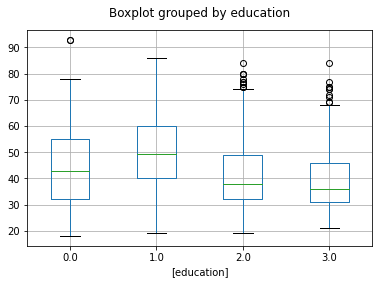

In [16]:
# Now we print a boxplot for age by education
dataFrame.boxplot(column = 'age', by = ['education'])
plt.title("")
plt.show()